Task 1: Линейная диаграмма

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sqlite3 import connect

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Установите соединение с базой данных

In [4]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

Выполните запрос, который достает datetime из таблицы pageviews; выбирайте только пользователей, а не администраторов.

In [5]:
pageviews = pd.read_sql("""
    SELECT
        datetime
    FROM
        pageviews
    WHERE
        uid like '%user%'
""", con, parse_dates=['datetime'])

In [6]:
pageviews

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [7]:
pageviews['date'] = pageviews['datetime'].dt.date
pageviews['views'] = 1

In [8]:
pageviews

,datetime,date,views
0,2020-04-17 22:46:26.785035,2020-04-17,1
1,2020-04-18 10:53:52.623447,2020-04-18,1
2,2020-04-18 10:56:55.833899,2020-04-18,1
3,2020-04-18 10:57:37.331258,2020-04-18,1
4,2020-04-18 12:05:48.200144,2020-04-18,1
...,...,...,...
982,2020-05-21 18:45:20.441142,2020-05-21,1
983,2020-05-21 23:03:06.457819,2020-05-21,1
984,2020-05-21 23:23:49.995349,2020-05-21,1
985,2020-05-22 11:30:18.368990,2020-05-22,1


In [9]:
pageviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  987 non-null    datetime64[ns]
 1   date      987 non-null    object        
 2   views     987 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.3+ KB


In [11]:
pageviews_d = pageviews.drop(columns="datetime").groupby(by='date', dropna = False).count()
pageviews_d.head()

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})

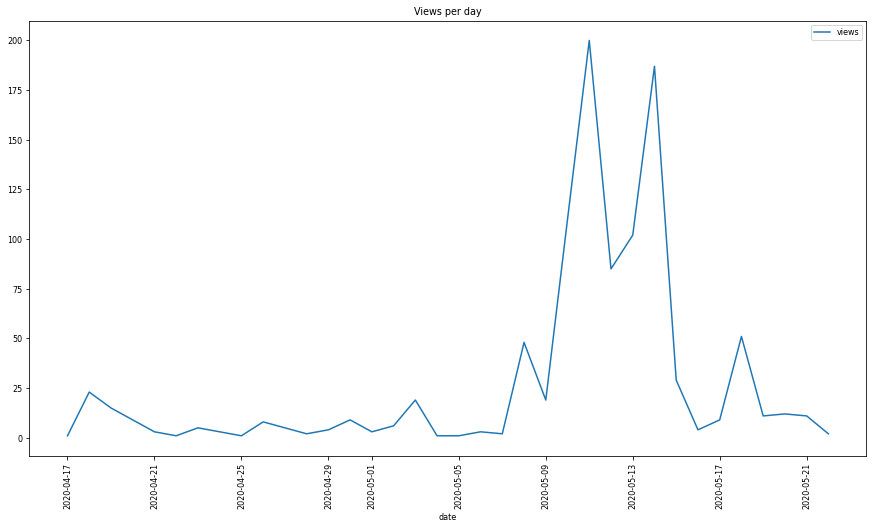

In [13]:
pageviews_d.plot(figsize=(15, 8), title = 'Views per day');
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)

In [14]:
con.close()